In [2]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import numpy as np


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\akiad\OneDrive\Documents\Data Analytics\Portfolio Projects\Five\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Calculating the missing value percentage of each column
for column in df.columns:
    percentage_missing = np.mean(df[column].isnull())
    print('{} - {}%'.format(column,percentage_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Displaying the data types of our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Converting budget and gross data to integer datatype

df['budget'].fillna(value=0, inplace=True)
df['budget'] = df['budget'].astype('int64')
df['gross'].fillna(value=0, inplace=True)
df['gross'] = df['gross'].astype('int64')

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [8]:
df['released_year_calc'] = ''

In [9]:
# Pullling the year data from the released column and assigning it to a new column

result=[]
for index, data in df.iterrows():
    try:
        if int(data['released'].split(',')[1].split(" ")[1]):
            result.append(data['released'].split(',')[1].split(" ")[1])
    except:
        try:
            try:
                if int(data['released'].split('(')[0].split(" ")[1]):
                    result.append(data['released'].split('(')[0].split(" ")[1])
            except:
                if int(data['released'].split('(')[0].split(" ")[0]):
                    result.append(data['released'].split('(')[0].split(" ")[0])
        except:
            result.append(None)
result

['1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1981',
 '1980',
 '1980',
 '1984',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1981',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1981',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1981',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1981',
 '1980',
 '1980',
 '1980',
 '1980',
 '1981',
 '1980',
 '1980',
 '1980',
 '1980',
 '1981',
 '1980',
 '1980',
 '1981',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1983',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1980',
 '1981',
 '1980',
 '1980',
 '1980',
 '1980',
 '1982',
 '1981',
 '1981',
 '1981',
 '1981',
 '1983',
 '1982',
 '1981',
 '1981',
 '1981',
 '1982',
 '1982',
 '1981',
 '1983',
 '1981',
 '1981',
 '1981',
 '1981',
 '1981',
 '1981',
 

In [11]:
df['released_year_calc'] = result

In [12]:
dat='1995 (Iran)'
try:
    if int(dat.split(',')[1].split(" ")[1]):
        print(dat.split(',')[1].split(" ")[1])
except:
    try:
        try:
            if int(dat.split('(')[0].split(" ")[1]):
                print(dat.split('(')[0].split(" ")[1])
        except:
            if int(dat.split('(')[0].split(" ")[0]):
                print(dat.split('(')[0].split(" ")[0])
    except:
        print(0)

1995


In [13]:
df.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year_calc
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [14]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(100)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year_calc
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,Deadpool 2,R,Action,2018,"May 18, 2018 (United States)",7.7,505000.0,David Leitch,Rhett Reese,Ryan Reynolds,Canada,110000000,786470484,Twentieth Century Fox,119.0,2018
6848,Deadpool,R,Action,2016,"February 12, 2016 (United States)",8.0,932000.0,Tim Miller,Rhett Reese,Ryan Reynolds,United States,58000000,782836791,Twentieth Century Fox,108.0,2016
6443,Guardians of the Galaxy,PG-13,Action,2014,"August 1, 2014 (United States)",8.0,1100000.0,James Gunn,James Gunn,Chris Pratt,United States,170000000,773350147,Marvel Studios,121.0,2014
4858,The Da Vinci Code,PG-13,Mystery,2006,"May 19, 2006 (United States)",6.6,410000.0,Ron Howard,Akiva Goldsman,Tom Hanks,United States,125000000,760006945,Columbia Pictures,149.0,2006


In [15]:
pd.set_option('display.max_rows', None)

In [16]:
# drop any duplicates

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year_calc
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


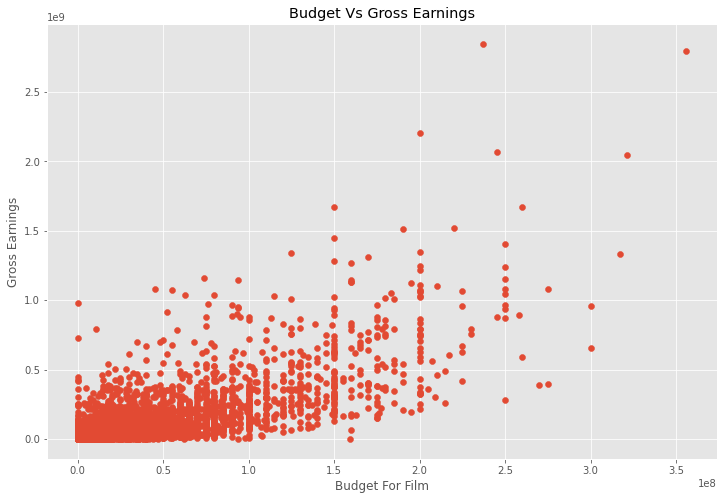

In [17]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

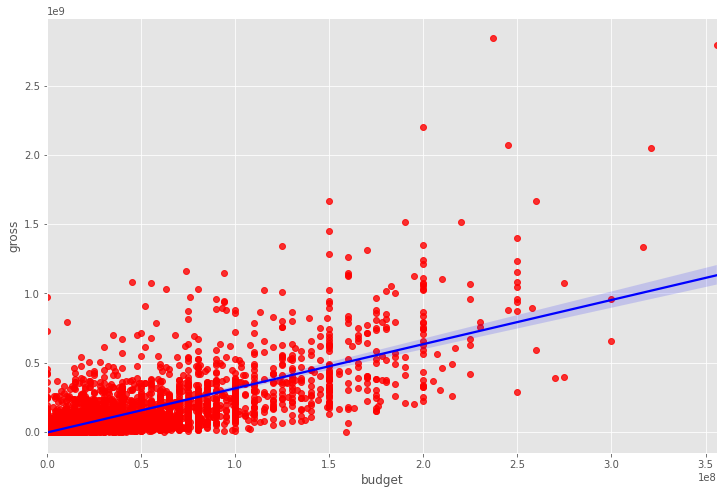

In [18]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [19]:
# Lets start looking at correlation

In [20]:
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [21]:
# High correlation between budget and gross

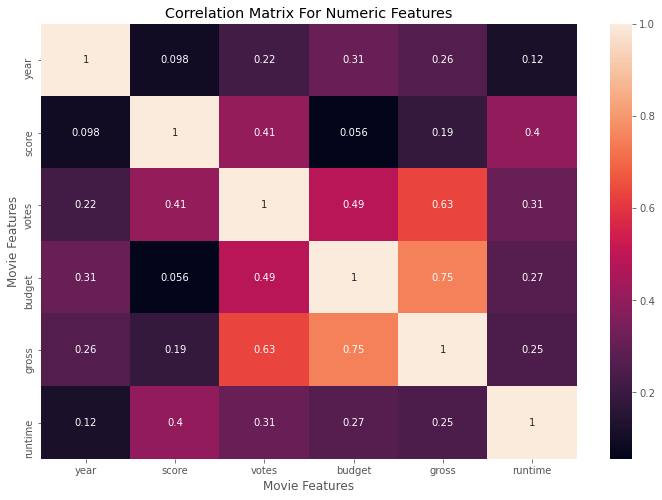

In [22]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [23]:
df_numerized = df.copy()

In [24]:
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(200)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year_calc
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000,39754601,1812,95.0,0
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0,0
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0,0
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0,1
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0,0


In [25]:
df_numerized.dtypes

name                    int16
rating                   int8
genre                    int8
year                    int64
released                int16
score                 float64
votes                 float64
director                int16
writer                  int16
star                    int16
country                  int8
budget                  int64
gross                   int64
company                 int16
runtime               float64
released_year_calc       int8
dtype: object

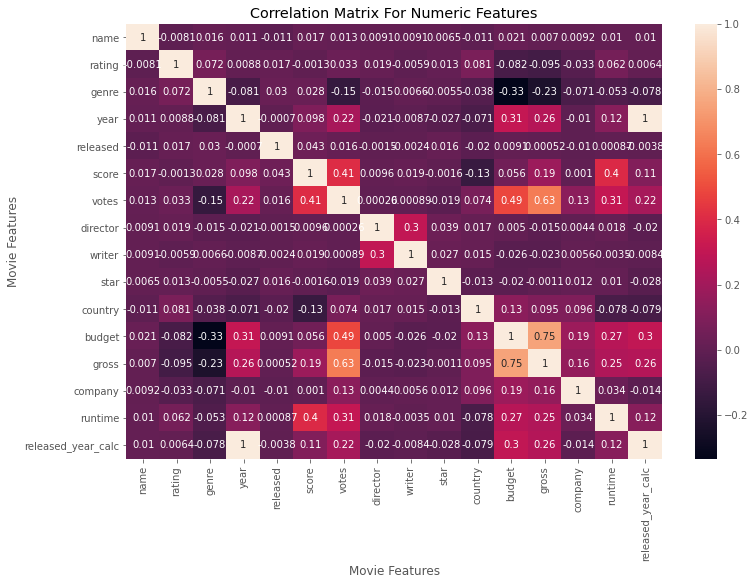

In [26]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [27]:
# here we can see that the pre-existing year column in the dataframe has wrong data and hence we calculated the year data ourselves
for index, data in df.iterrows():
    if data['year']==int(data['released_year_calc']):
        print('yes')
    else:
        print('None')

yes
yes
yes
yes
yes
yes
yes
yes
None
yes
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
yes
yes
yes
yes
yes
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
None
yes
yes
yes
yes
None
yes
yes
yes
yes
None
yes
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
yes
yes
yes
yes
yes
yes
None
yes
yes
yes
yes
None
yes
yes
yes
yes
None
None
yes
yes
yes
None
None
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
yes
yes
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
yes
yes
yes
yes
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
None
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
yes
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
None
yes
yes
yes
None
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
None
yes
yes
yes
y

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [28]:
df.head(200)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year_calc
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [29]:
correlation_mat = df_numerized.corr()
correlation_pairs = correlation_mat.unstack()
correlation_pairs

name                name                  1.000000
                    rating               -0.008069
                    genre                 0.016355
                    year                  0.011453
                    released             -0.011311
                    score                 0.017097
                    votes                 0.013088
                    director              0.009079
                    writer                0.009081
                    star                  0.006472
                    country              -0.010737
                    budget                0.020548
                    gross                 0.006989
                    company               0.009211
                    runtime               0.010392
                    released_year_calc    0.010225
rating              name                 -0.008069
                    rating                1.000000
                    genre                 0.072423
                    year       

In [30]:
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

budget              genre                -0.334021
genre               budget               -0.334021
                    gross                -0.234297
gross               genre                -0.234297
votes               genre                -0.145307
genre               votes                -0.145307
score               country              -0.133348
country             score                -0.133348
rating              gross                -0.095450
gross               rating               -0.095450
budget              rating               -0.081939
rating              budget               -0.081939
genre               year                 -0.081261
year                genre                -0.081261
country             released_year_calc   -0.079009
released_year_calc  country              -0.079009
runtime             country              -0.078412
country             runtime              -0.078412
released_year_calc  genre                -0.078210
genre               released_ye

In [31]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross               votes                 0.632834
votes               gross                 0.632834
gross               budget                0.750157
budget              gross                 0.750157
released_year_calc  year                  0.996397
year                released_year_calc    0.996397
name                name                  1.000000
company             company               1.000000
gross               gross                 1.000000
budget              budget                1.000000
country             country               1.000000
star                star                  1.000000
writer              writer                1.000000
director            director              1.000000
votes               votes                 1.000000
score               score                 1.000000
released            released              1.000000
year                year                  1.000000
genre               genre                 1.000000
rating              rating     

In [32]:
# votes and budget have the highest correlation to gross